In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy.integrate import odeint
import collections

np.seterr(all='ignore');

In [2]:
def dynkind(N, r):
    dyn=[collections.defaultdict(lambda : r**2),{1:0,2:1/2,3:2,4:5},{1:0,3:1/2,6:5/2,8:3,10:15/2,15:10}]
    return dyn[N-1][r]

def casimir(N, r):
    cas=[collections.defaultdict(lambda : r**2),{1:0,2:3/4,3:2,4:15/4},{1:0,3:4/3,6:10/3,8:3,10:6,15:16/3}]
    return cas[N-1][r]

def casadj(i):
    return 0 if i==1 else i

#More values to be added

RGE and beta functions as per: https://doi.org/10.1007/JHEP07(2015)074 (arXiv: https://arxiv.org/abs/1504.00359, page 41);

Corrected version of $b_{ij}$ here: https://doi.org/10.1103/PhysRevD.104.075017 (arXiv: https://arxiv.org/abs/2107.12378, page 4)

## SM beta functions

$a_i = -11/3 C_2(G_i) +4/3\sum_F \kappa S_2(F_i) + 1/3 \sum_S \eta S_2(S_i)$


$b_{ij} = \left[ -34/3 (C_2(G_i))^2 + \sum_F \left( 4C_2(F_i) +20/3C_2(G_i) \right) \kappa S_2(F_i) +\sum_S \left(4C_2(S_i)+2/3 C_2(G_i)\right) \eta S_2(S_i)\right]\delta_{ij} + 4 \left[ \sum_F \kappa C_2(F_j)S_2(F_i) + \sum_S \eta C_2(S_j)S_2(S_i) \right](1-\delta_{ij})$

In [3]:
n_g = 3
a_SM = [4/3*n_g+1/10,-(22/3-4/3*n_g-1/6),-(11-4/3*n_g)]
b1 = np.array([[0,0,0],[0,136/3,0],[0,0,102]])
b2 = n_g*np.array([[19/15,1/5,11/30],[3/5,49/3,3/2],[44/15,4,76/3]])
b3 = np.array([[9/50,3/10,0],[9/10,13/6,0],[0,0,0]])
b_SM = -(b1-b2-b3)
b_SM = b_SM.transpose()

In [4]:
def extend(fD_bSM,fW_bSM,sC_bSM,sR_bSM):

    a_bSM=[0,0,0]
    b_bSM=np.zeros((3,3))
    
    if len(fD_bSM)!=0:
        kappa = 1
        fD_bSM = np.array(fD_bSM).astype(float)
        fD_bSM[0] = np.sqrt(3/5)*fD_bSM[0]
        for i in range(len(fD_bSM[0])):
            a_bSM[0] = a_bSM[0] + 4/3*kappa*dynkind(1,fD_bSM[0][i])*fD_bSM[1][i]*fD_bSM[2][i]
            a_bSM[1] = a_bSM[1] + 4/3*kappa*dynkind(2,fD_bSM[1][i])*fD_bSM[2][i]
            a_bSM[2] = a_bSM[2] + 4/3*kappa*dynkind(3,fD_bSM[2][i])*fD_bSM[1][i]
        
            b_bSM[0][0] = b_bSM[0][0] + kappa*dynkind(1,fD_bSM[0][i])*(4*casimir(1,fD_bSM[0][i]) + 20/3*casadj(1))*fD_bSM[1][i]*fD_bSM[2][i]
            b_bSM[1][1] = b_bSM[1][1] + kappa*dynkind(2,fD_bSM[1][i])*(4*casimir(2,fD_bSM[1][i]) + 20/3*casadj(2))*fD_bSM[2][i] #
            b_bSM[2][2] = b_bSM[2][2] + kappa*dynkind(3,fD_bSM[2][i])*(4*casimir(3,fD_bSM[2][i]) + 20/3*casadj(3))*fD_bSM[1][i] #
            b_bSM[0][1] = b_bSM[0][1] + 4*kappa*casimir(2,fD_bSM[1][i])*dynkind(1,fD_bSM[0][i])*fD_bSM[1][i]*fD_bSM[2][i]
            b_bSM[1][0] = b_bSM[1][0] + 4*kappa*casimir(1,fD_bSM[0][i])*dynkind(2,fD_bSM[1][i])*fD_bSM[2][i] #
            b_bSM[0][2] = b_bSM[0][2] + 4*kappa*casimir(3,fD_bSM[2][i])*dynkind(1,fD_bSM[0][i])*fD_bSM[1][i]*fD_bSM[2][i]
            b_bSM[2][0] = b_bSM[2][0] + 4*kappa*casimir(1,fD_bSM[0][i])*dynkind(3,fD_bSM[2][i])*fD_bSM[1][i] #
            b_bSM[1][2] = b_bSM[1][2] + 4*kappa*casimir(3,fD_bSM[2][i])*dynkind(2,fD_bSM[1][i])*fD_bSM[2][i] #
            b_bSM[2][1] = b_bSM[2][1] + 4*kappa*casimir(2,fD_bSM[1][i])*dynkind(3,fD_bSM[2][i])*fD_bSM[1][i] #
    
    if len(fW_bSM)!=0:
        kappa = 1/2
        fW_bSM = np.array(fW_bSM).astype(float)
        fW_bSM[0] = np.sqrt(3/5)*fW_bSM[0]
        for i in range(len(fW_bSM[0])):
            a_bSM[0] = a_bSM[0] + 4/3*kappa*dynkind(1,fW_bSM[0][i])*fW_bSM[1][i]*fW_bSM[2][i]
            a_bSM[1] = a_bSM[1] + 4/3*kappa*dynkind(2,fW_bSM[1][i])*fW_bSM[2][i]
            a_bSM[2] = a_bSM[2] + 4/3*kappa*dynkind(3,fW_bSM[2][i])*fW_bSM[1][i]
        
            b_bSM[0][0] = b_bSM[0][0] + kappa*dynkind(1,fW_bSM[0][i])*(4*casimir(1,fW_bSM[0][i]) + 20/3*casadj(1))*fW_bSM[1][i]*fW_bSM[2][i]
            b_bSM[1][1] = b_bSM[1][1] + kappa*dynkind(2,fW_bSM[1][i])*(4*casimir(2,fW_bSM[1][i]) + 20/3*casadj(2))*fW_bSM[2][i] #
            b_bSM[2][2] = b_bSM[2][2] + kappa*dynkind(3,fW_bSM[2][i])*(4*casimir(3,fW_bSM[2][i]) + 20/3*casadj(3))*fW_bSM[1][i] #
            b_bSM[0][1] = b_bSM[0][1] + 4*kappa*casimir(2,fW_bSM[1][i])*dynkind(1,fW_bSM[0][i])*fW_bSM[1][i]*fW_bSM[2][i]
            b_bSM[1][0] = b_bSM[1][0] + 4*kappa*casimir(1,fW_bSM[0][i])*dynkind(2,fW_bSM[1][i])*fW_bSM[2][i] #
            b_bSM[0][2] = b_bSM[0][2] + 4*kappa*casimir(3,fW_bSM[2][i])*dynkind(1,fW_bSM[0][i])*fW_bSM[1][i]*fW_bSM[2][i]
            b_bSM[2][0] = b_bSM[2][0] + 4*kappa*casimir(1,fW_bSM[0][i])*dynkind(3,fW_bSM[2][i])*fW_bSM[1][i] #
            b_bSM[1][2] = b_bSM[1][2] + 4*kappa*casimir(3,fW_bSM[2][i])*dynkind(2,fW_bSM[1][i])*fW_bSM[2][i] #
            b_bSM[2][1] = b_bSM[2][1] + 4*kappa*casimir(2,fW_bSM[1][i])*dynkind(3,fW_bSM[2][i])*fW_bSM[1][i] #
            
    if len(sC_bSM)!=0:
        kappa = 1
        sC_bSM = np.array(sC_bSM).astype(float)
        sC_bSM[0] = np.sqrt(3/5)*sC_bSM[0]
        for i in range(len(sC_bSM[0])):
            a_bSM[0] = a_bSM[0] + 1/3*kappa*dynkind(1,sC_bSM[0][i])*sC_bSM[1][i]*sC_bSM[2][i]
            a_bSM[1] = a_bSM[1] + 1/3*kappa*dynkind(2,sC_bSM[1][i])*sC_bSM[2][i]
            a_bSM[2] = a_bSM[2] + 1/3*kappa*dynkind(3,sC_bSM[2][i])*sC_bSM[1][i]
        
            b_bSM[0][0] = b_bSM[0][0] + kappa*dynkind(1,sC_bSM[0][i])*(4*casimir(1,sC_bSM[0][i]) + 2/3*casadj(1))*sC_bSM[1][i]*sC_bSM[2][i]
            b_bSM[1][1] = b_bSM[1][1] + kappa*dynkind(2,sC_bSM[1][i])*(4*casimir(2,sC_bSM[1][i]) + 2/3*casadj(2))*sC_bSM[2][i] #
            b_bSM[2][2] = b_bSM[2][2] + kappa*dynkind(3,sC_bSM[2][i])*(4*casimir(3,sC_bSM[2][i]) + 2/3*casadj(3))*sC_bSM[1][i] #
            b_bSM[0][1] = b_bSM[0][1] + 4*kappa*casimir(2,sC_bSM[1][i])*dynkind(1,sC_bSM[0][i])*sC_bSM[1][i]*sC_bSM[2][i]
            b_bSM[1][0] = b_bSM[1][0] + 4*kappa*casimir(1,sC_bSM[0][i])*dynkind(2,sC_bSM[1][i])*sC_bSM[2][i] #
            b_bSM[0][2] = b_bSM[0][2] + 4*kappa*casimir(3,sC_bSM[2][i])*dynkind(1,sC_bSM[0][i])*sC_bSM[1][i]*sC_bSM[2][i]
            b_bSM[2][0] = b_bSM[2][0] + 4*kappa*casimir(1,sC_bSM[0][i])*dynkind(3,sC_bSM[2][i])*sC_bSM[1][i] #
            b_bSM[1][2] = b_bSM[1][2] + 4*kappa*casimir(3,sC_bSM[2][i])*dynkind(2,sC_bSM[1][i])*sC_bSM[2][i] #
            b_bSM[2][1] = b_bSM[2][1] + 4*kappa*casimir(2,sC_bSM[1][i])*dynkind(3,sC_bSM[2][i])*sC_bSM[1][i] #
            
    if len(sR_bSM)!=0:
        kappa = 1/2
        sR_bSM = np.array(sR_bSM).astype(float)
        sR_bSM[0] = np.sqrt(3/5)*sR_bSM[0]
        for i in range(len(sR_bSM[0])):
            a_bSM[0] = a_bSM[0] + 1/3*kappa*dynkind(1,sR_bSM[0][i])*sR_bSM[1][i]*sR_bSM[2][i]
            a_bSM[1] = a_bSM[1] + 1/3*kappa*dynkind(2,sR_bSM[1][i])*sR_bSM[2][i]
            a_bSM[2] = a_bSM[2] + 1/3*kappa*dynkind(3,sR_bSM[2][i])*sR_bSM[1][i]
        
            b_bSM[0][0] = b_bSM[0][0] + kappa*dynkind(1,sR_bSM[0][i])*(4*casimir(1,sR_bSM[0][i]) + 2/3*casadj(1))*sR_bSM[1][i]*sR_bSM[2][i]
            b_bSM[1][1] = b_bSM[1][1] + kappa*dynkind(2,sR_bSM[1][i])*(4*casimir(2,sR_bSM[1][i]) + 2/3*casadj(2))*sR_bSM[2][i] #
            b_bSM[2][2] = b_bSM[2][2] + kappa*dynkind(3,sR_bSM[2][i])*(4*casimir(3,sR_bSM[2][i]) + 2/3*casadj(3))*sR_bSM[1][i] #
            b_bSM[0][1] = b_bSM[0][1] + 4*kappa*casimir(2,sR_bSM[1][i])*dynkind(1,sR_bSM[0][i])*sR_bSM[1][i]*sR_bSM[2][i]
            b_bSM[1][0] = b_bSM[1][0] + 4*kappa*casimir(1,sR_bSM[0][i])*dynkind(2,sR_bSM[1][i])*sR_bSM[2][i] #
            b_bSM[0][2] = b_bSM[0][2] + 4*kappa*casimir(3,sR_bSM[2][i])*dynkind(1,sR_bSM[0][i])*sR_bSM[1][i]*sR_bSM[2][i]
            b_bSM[2][0] = b_bSM[2][0] + 4*kappa*casimir(1,sR_bSM[0][i])*dynkind(3,sR_bSM[2][i])*sR_bSM[1][i] #
            b_bSM[1][2] = b_bSM[1][2] + 4*kappa*casimir(3,sR_bSM[2][i])*dynkind(2,sR_bSM[1][i])*sR_bSM[2][i] #
            b_bSM[2][1] = b_bSM[2][1] + 4*kappa*casimir(2,sR_bSM[1][i])*dynkind(3,sR_bSM[2][i])*sR_bSM[1][i] #
    
    return a_bSM, b_bSM

## RGE: 
$\frac{d}{dt}\alpha_i^{-1} = -a_i - \frac{b_{ij}}{4\pi}\alpha_j$

In [5]:
def solve_n_plot(a_bSM,b_bSM, a_SM, b_SM, m_Q=5*10**11):    
    def solver(y, t, a_SM, b_SM, a_bSM, b_bSM):
        if t < np.log(m_Q/91.188)/(2*np.pi):
            a = a_SM
            b = b_SM
        else:
            a = a_SM + a_bSM
            b = b_SM + b_bSM
        dydt = -a-np.matmul(b,1/y)/(4*np.pi)
        return dydt

    t = np.linspace(0,20,100000)

    y0=np.array([1/0.016923, 1/0.03374, 1/0.1173]) #\alpha^{-1} at m_Z = 91.188 GeV

    test = odeint(solver, y0, t, args=(np.array(a_SM),np.array(b_SM),np.array(a_bSM),np.array(b_bSM)))

    alpha1=1/test[:, 0]
    alpha2=1/test[:, 1]
    alpha3=1/test[:, 2]

    return alpha1, alpha2, alpha3, t

In [6]:
def results(alpha1, alpha2, alpha3, t, threshold = 10**18, plot = True, dialogue = True):
    
    mZ = 91.188 #GeV
    mu=mZ*np.exp(2*np.pi*t)
    g1=np.sqrt(4*np.pi*alpha1)
    g2=np.sqrt(4*np.pi*alpha2)
    g3=np.sqrt(4*np.pi*alpha3)
    
    if plot == True:
        plt.plot(mu, g1, 'r', label=r'$g_1$', linewidth=2);
        plt.plot(mu, g2, 'g', label=r'$g_2$', linewidth=2);
        plt.plot(mu, g3, 'b', label=r'$g_3$', linewidth=2);
#         plt.vlines(threshold, 0, 2, linewidth=1, linestyle='dashed', color='grey')
        plt.xlim(left=10**0)
        plt.ylim(top=2,bottom=0)
        plt.xlabel(r'Energy scale $\mu$ (GeV)')
        plt.ylabel(r'Coupling value $g$')
        plt.xscale('log')
        plt.gca().yaxis.set_ticks_position('both')
        plt.legend()
        plt.show()
        
    if dialogue == True:
        print('--------------------------------------------------------------------------------------------')
        if mu[np.where(1/g1==0)[0][0]] < threshold or mu[np.where(1/g2==0)[0][0]] < threshold or mu[np.where(1/g3==0)[0][0]] < threshold:
            print('LP below {:.2e} GeV!'.format(threshold))
        else:
            print('No LP below {:.2e} GeV.'.format(threshold))
    
        print('--------------------------------------------------------------------------------------------')
    
    return 1 if mu[np.where(1/g1==0)[0][0]] < threshold or mu[np.where(1/g1==0)[0][0]] < threshold or mu[np.where(1/g1==0)[0][0]] < threshold else 0

In [7]:
def do_it(fD,fW,sC,sR,mfD,mfW,msC,msR, threshold = 10**18, plot = True, dialogue = True):
#     a_SM, b_SM = SM()
    a, b = extend(fD,fW,sC,sR)
    al1, al2, al3, t = solve_n_plot(a,b, a_SM, b_SM, mfD)
    flag = results(al1, al2, al3, t, threshold, plot, dialogue)
    return a,b,flag

C:\Users\Vaisakh\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


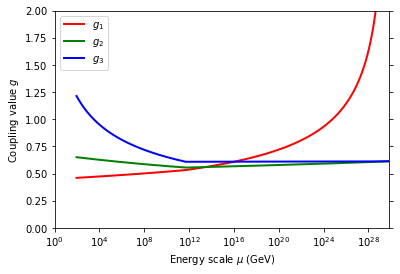

--------------------------------------------------------------------------------------------
No LP below 1.00e+18 GeV.
--------------------------------------------------------------------------------------------
Wall time: 2.64 s


In [13]:
%%time
                              
fermion_dirac = [[1/2],[2],[6]] #BSM (Dirac) fermion ([[U(1) hypercharge], [SU(2) dim], [SU(3) dim]]); (1,1,0) for SM
                                       #Multiple fermions: e.g. (15,1,1/6)+(8,1,7/6) given as [[1/6,7/6],[1,1],[15,8]]
fermion_weyl = []
scalar_complex = []  
scalar_real = []

mfD = 5*10**11                         #Masses
mfW = 0                                #Currently uses mentioned Dirac fermion mass for all particles,
msC = 0                                #to be changed in later version
msR = 0

threshold = 10**18                     #Threshold for LP to be checked

plot = True
dialogue = True

a,b,f=do_it(fermion_dirac, fermion_weyl, scalar_complex, scalar_real, mfD, mfW, msC, msR, threshold, plot, dialogue)

A loop for different masses and thresholds; gives the maximum number of copies of a particle that can be included before hitting an LP below the threshold(s):

In [84]:
%%time

masses = np.array([10**7,10**8,10**9,10**10,10**11,10**12,10**13,10**14,10**15,10**16]).astype(float)
thresholds = np.array([10**16,10**17,10**18,10**19]).astype(float)
mat=np.zeros([10,4])

for i in range(len(masses)):
    for j in range(len(thresholds)):
        for n in range(15,500):
            fermion_dirac = [[-1/3]*n,[1]*n,[3]*n]
            a,b,f=do_it(fermion_dirac, [], [], [], masses[i], 0, 0, 0, thresholds[j], plot = False, dialogue = False)
            if f==1:
                mat[i][j]=n-1
                break;
                
mat

Wall time: 5min 35s


array([[ 17.,  16.,  15.,  15.],
       [ 19.,  18.,  17.,  16.],
       [ 22.,  20.,  19.,  18.],
       [ 26.,  24.,  22.,  20.],
       [ 31.,  28.,  25.,  23.],
       [ 40.,  33.,  29.,  27.],
       [ 53.,  42.,  36.,  31.],
       [ 80.,  57.,  45.,  38.],
       [162.,  85.,  60.,  47.],
       [  0., 172.,  91.,  63.]])

### Caveats:
1. All SM fields integrated in at Z mass. The Higgs boson and the top quark should ideally be integrated in at their mass scales, but it does not have a significant effect at large energies, when BSM particles are considered to have masses many orders of magnitude larger than SM ones. The SM beta functions can be modified accordingly (and the two fields included separately at their masses) in case a more precise result is required.
2. All BSM fields of same type are included at the same mass. In general, one would require the possibility of having particles of the same type but different representations and masses and this can be implemented by calculating the corrections to the beta functions separately for the fields and using them in accordingly (not done here due to excessive laziness and to avoid possibly having another loop in the "extend" function).
3. Apart for that, the code also suffers from my severe lack of programming skills.